# In-class work

Note: This is the live notebook I used to demo the functionality in class.

Take a look at the `in-class-demos.ipynb` for a more pedagogical explanation of the same material.

In [1]:
import pandas as pd
import numpy as np
import sqlite3

In [2]:
import os
try:
    os.remove("msdss.db")
except OSError:
    pass

In [3]:
con = sqlite3.connect("msdss.db")

In [4]:
con.execute("""
CREATE TABLE `sources` (
	`run`	INTEGER,
	`rerun`	INTEGER,
	`camcol`	INTEGER,
	`field`	INTEGER,
	`obj`	INTEGER,
	`type`	INTEGER,

	`ra`	REAL,
	`dec`	REAL,
	`psfMag_r`	REAL,
	`psfMag_g`	REAL,
	`psfMagErr_r`	REAL,
	`psfMagErr_g`	REAL
);
""")

In [5]:
con.execute("""
CREATE TABLE `runs` (
	`run`	INTEGER,
	`ra`	REAL,
	`dec`	REAL,
	`mjdstart`	REAL,
	`mjdend`	REAL,
	`node`	REAL,
	`inclination`	REAL,
	`mu0`	REAL,
	`nu0`	REAL
);
""")

In [18]:
runs2 = pd.read_csv('runs.txt', 
            sep=" ", header=None, skiprows=1)

In [19]:
runs2[:2]

,0,1,2,3,4,5,6,7,8
0,94,336.432779,-1.044294,51075.233211,51075.455014,286.855205,0.009477,336.432667,-1.051509
1,109,396.241809,-1.250557,51078.390783,51078.474944,283.391747,0.008279,36.241879,-1.258186


In [6]:
runs = pd.read_csv('runs.txt', 
            sep=" ", header=None, skiprows=1, 
            names=['run', 'ra', 'dec', 'mjdstart', 'mjdend', 'node', 'inclination', 'mu0', 'nu0'],
            index_col = 'run')

In [7]:
type(runs)

pandas.core.frame.DataFrame

In [8]:
runs[:5]

,ra,dec,mjdstart,mjdend,node,inclination,mu0,nu0
run,,,,,,,,
94,336.432779,-1.044294,51075.233211,51075.455014,286.855205,0.009477,336.432667,-1.051509
109,396.241809,-1.250557,51078.390783,51078.474944,283.391747,0.008279,36.241879,-1.258186
125,350.469743,-1.252750,51081.255759,51081.495289,287.818732,0.007781,350.469664,-1.259661
211,402.581109,-1.265170,51115.307000,51115.462055,283.219780,0.007975,42.581196,-1.272121
240,375.189678,-1.264403,51132.185032,51132.248851,290.578187,0.010103,15.189657,-1.274462


In [9]:
runs.dtypes

ra             float64
dec            float64
mjdstart       float64
mjdend         float64
node           float64
inclination    float64
mu0            float64
nu0            float64
dtype: object

In [10]:
sources = pd.read_csv('sample.csv', index_col=['run', 'rerun', 'camcol', 'field', 'obj'])

In [13]:
sources[:5]

type         ra        dec  psfMag_r  psfMag_g  \
run  rerun camcol field obj                                                   
7757 301   1      74    186     6   8.129444  26.626617  17.04889  18.16535   
                        187     6   8.127839  26.627246  17.37402  17.92875   
                        188     3   8.127323  26.625120  20.14660  21.35297   
4288 301   1      39    682     3  24.516117  -1.165794  22.97032  24.32590   
                        683     3  24.517941  -1.179207  22.62052  25.09109   

                             psfMagErr_r  psfMagErr_g  
run  rerun camcol field obj                            
7757 301   1      74    186     0.016548     0.021452  
                        187     0.028945     0.025680  
                        188     0.300374     0.330276  
4288 301   1      39    682     0.267240     0.524044  
                        683     0.185048     0.658581

In [14]:
sources.dtypes

type             int64
ra             float64
dec            float64
psfMag_r       float64
psfMag_g       float64
psfMagErr_r    float64
psfMagErr_g    float64
dtype: object

In [15]:
sources = pd.read_csv('sample.csv',
                        dtype={
                                'type': 'int8',
                                'psfMag_r': np.float32,
                                'psfMag_g': np.float32,
                                'psfMagErr_r': np.float32,
                                'psfMagErr_g': np.float32,
                              },
                        index_col=['run', 'rerun', 'camcol', 'field', 'obj'])

In [16]:
sources.dtypes

type              int8
ra             float64
dec            float64
psfMag_r       float32
psfMag_g       float32
psfMagErr_r    float32
psfMagErr_g    float32
dtype: object

In [21]:
sources[sources["psfMag_g"] < 0][:5]

type          ra        dec  psfMag_r  psfMag_g  \
run  rerun camcol field obj                                                     
3366 301   1      80    3009     0   12.231521  41.113295     -9999     -9999   
                        3010     0   12.082267  41.206067     -9999     -9999   
                        3011     0   12.184899  41.142380     -9999     -9999   
3996 301   1      162   1413     0  228.319441   9.958091     -9999     -9999   
4894 301   1      174   592      0  352.075004  -0.932815     -9999     -9999   

                              psfMagErr_r  psfMagErr_g  
run  rerun camcol field obj                             
3366 301   1      80    3009        -9999        -9999  
                        3010        -9999        -9999  
                        3011        -9999        -9999  
3996 301   1      162   1413        -9999        -9999  
4894 301   1      174   592         -9999        -9999

In [22]:
sources = pd.read_csv('sample.csv', index_col=['run', 'rerun', 'camcol', 'field', 'obj'], na_values=["-9999"])

In [23]:
sources[sources["psfMag_g"] < 0][:5]

,,,,,type,ra,dec,psfMag_r,psfMag_g,psfMagErr_r,psfMagErr_g
run,rerun,camcol,field,obj,,,,,,,


In [25]:
sources[sources["psfMag_g"].isnull()][:5]

type          ra        dec  psfMag_r  psfMag_g  \
run  rerun camcol field obj                                                     
3366 301   1      80    3009     0   12.231521  41.113295       NaN       NaN   
                        3010     0   12.082267  41.206067       NaN       NaN   
                        3011     0   12.184899  41.142380       NaN       NaN   
3996 301   1      162   1413     0  228.319441   9.958091       NaN       NaN   
4894 301   1      174   592      0  352.075004  -0.932815       NaN       NaN   

                              psfMagErr_r  psfMagErr_g  
run  rerun camcol field obj                             
3366 301   1      80    3009          NaN          NaN  
                        3010          NaN          NaN  
                        3011          NaN          NaN  
3996 301   1      162   1413          NaN          NaN  
4894 301   1      174   592           NaN          NaN

In [26]:
runs.to_sql('runs', con, if_exists='append')

In [27]:
sources.to_sql('sources', con, if_exists='append')

In [28]:
result = pd.read_sql("""
    SELECT
        sources.ra, sources.dec, sources.run, mjdstart
    FROM
        sources JOIN runs ON sources.run = runs.run
""", con)

In [29]:
result[:5]

,ra,dec,run,mjdstart
0,8.129444,26.626617,7757,54764.323971
1,8.127839,26.627246,7757,54764.323971
2,8.127323,26.625120,7757,54764.323971
3,24.516117,-1.165794,4288,52971.187293
4,24.517941,-1.179207,4288,52971.187293


In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

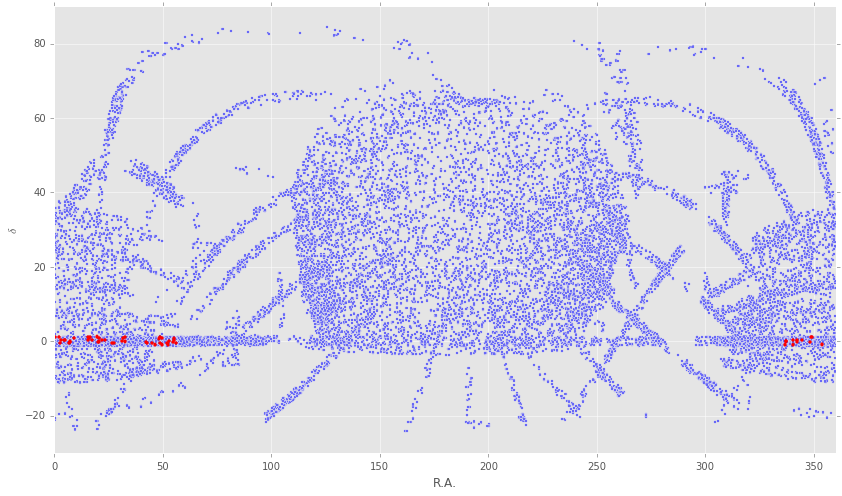

In [31]:
fig, ax = plt.subplots(figsize=(14,8))
ax.scatter(result.ra, result.dec, marker='.')

someRun = result[result.run == 94]
ax.scatter(someRun.ra, someRun.dec, color='r', marker='.')

ax.set_xlim(0, 360)
ax.set_ylim(-30, 90)

ax.set_xlabel("R.A.")
ax.set_ylabel("$\delta$")